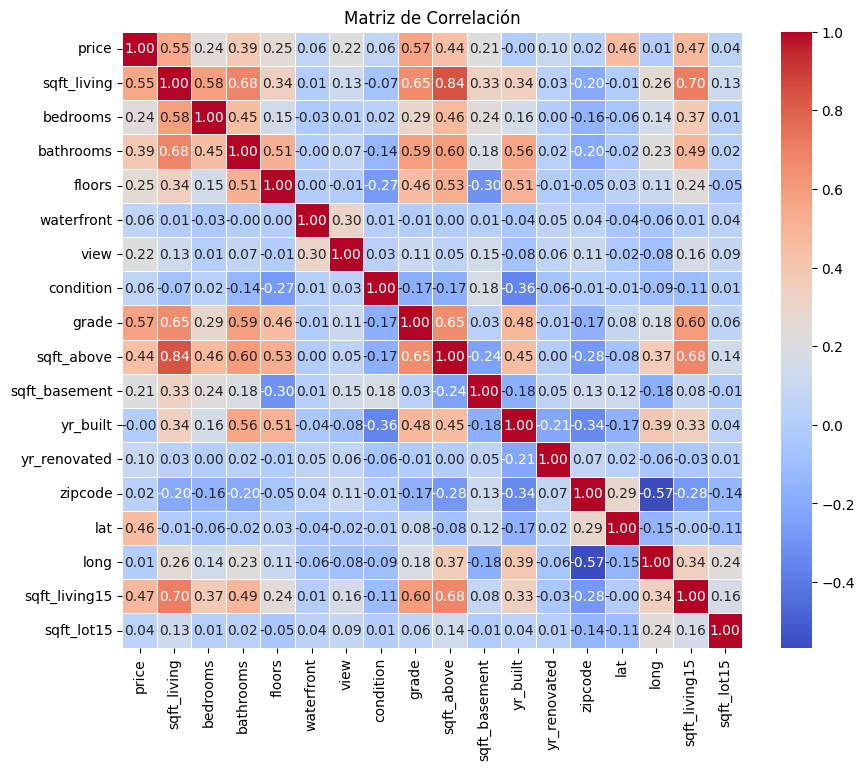

Nueva longitud de sqft_living_limpio: 18563
Nueva longitud de price_limpio: 18563


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Para mejorar la visualización
from scipy.stats import zscore

# Cargar dataset
data = pd.read_csv("Datasets/kc_house_data.csv")

# Seleccionar solo las columnas necesarias
data = data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

# Eliminar filas con NaN
data = data.dropna()

# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]

# Función para eliminar outliers usando Z-score
def eliminar_outliers_zscore(df, col):
    z_scores = np.abs(zscore(df[col]))
    return df[z_scores < 3]

# Aplicar eliminación de outliers con IQR y Z-score a las columnas clave
columns_to_clean = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_living15']
for col in columns_to_clean:
    data = eliminar_outliers_iqr(data, col)
    data = eliminar_outliers_zscore(data, col)

# Matriz de correlación
corr = data.corr()

# Visualizar matriz de correlación mejorada
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtrar solo sqft_living y price para análisis posterior
data2 = data[['sqft_living', 'price']]

# Extraer datos limpios
sqft_living_limpio = data2['sqft_living']
price_limpio = data2['price']

print(f"Nueva longitud de sqft_living_limpio: {len(sqft_living_limpio)}")
print(f"Nueva longitud de price_limpio: {len(price_limpio)}")







Longitud de sqft_living_boxcox: 18563
Longitud de price_boxcox: 18563
Matriz de correlación:
                    Sqft_Living_BoxCox  Price_BoxCox
Sqft_Living_BoxCox            1.000000      0.550413
Price_BoxCox                  0.550413      1.000000


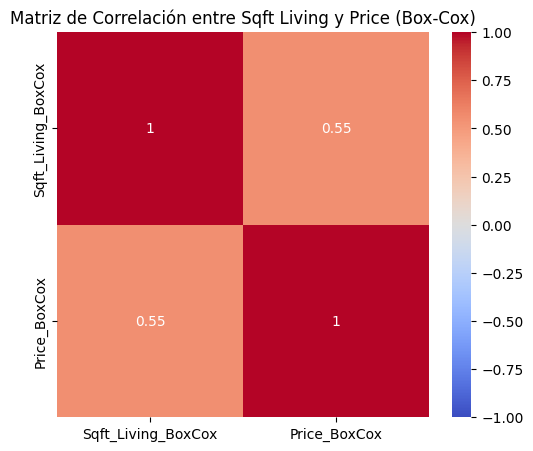

In [44]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Asegurarse de que las columnas no contienen valores NaN
data2['sqft_living'] = pd.to_numeric(data2['sqft_living'], errors='coerce')
data2['price'] = pd.to_numeric(data2['price'], errors='coerce')

# Eliminar NaN en ambas columnas
data2 = data2.dropna(subset=['sqft_living', 'price'])

# Alinear los índices de ambas columnas
common_index = data2['sqft_living'].index.intersection(data2['price'].index)

# Filtrar las columnas para que ambas tengan el mismo índice
sqft_living_limpio = data2['sqft_living'].loc[common_index]
price_limpio = data2['price'].loc[common_index]

# Aplicar Box-Cox solo si los datos son positivos
sqft_living_limpio = sqft_living_limpio[sqft_living_limpio > 0]
price_limpio = price_limpio[price_limpio > 0]

# Aplicar la transformación Box-Cox
sqft_living_boxcox, lambda_sqft_living = boxcox(sqft_living_limpio)
price_boxcox, lambda_price = boxcox(price_limpio)

# Verificar longitudes después de la transformación
print(f"Longitud de sqft_living_boxcox: {len(sqft_living_boxcox)}")
print(f"Longitud de price_boxcox: {len(price_boxcox)}")

# Crear un DataFrame con las columnas transformadas
df_sin_outliers = pd.DataFrame({
    "Sqft_Living_BoxCox": sqft_living_boxcox,
    "Price_BoxCox": price_boxcox
})

# Calcular la matriz de correlación
correlation_matrix = df_sin_outliers.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Sqft Living y Price (Box-Cox)")
plt.show()


In [31]:
# Asegurar que solo se mantienen valores positivos en sqft_living y price
data2 = data2[(data2["sqft_living"] > 0) & (data2["price"] > 0)]

# Extraer las columnas de nuevo asegurando que tienen el mismo índice
sqft_living_limpio = data2["sqft_living"]
price_limpio = data2["price"]

print("Primeros índices de sqft_living_limpio:", sqft_living_limpio.index[:5])
print("Primeros índices de price_limpio:", price_limpio.index[:5])


Primeros índices de sqft_living_limpio: Index([0, 1, 2, 3, 4], dtype='int64')
Primeros índices de price_limpio: Index([0, 1, 2, 3, 4], dtype='int64')


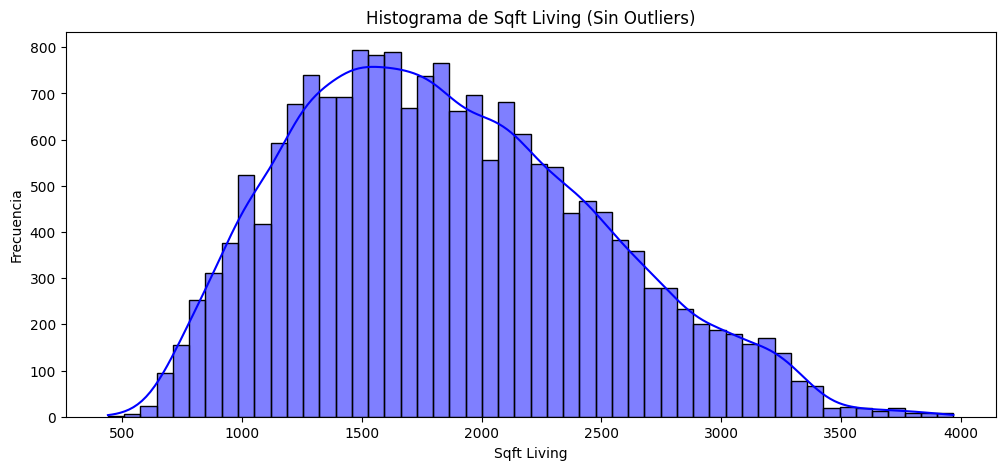

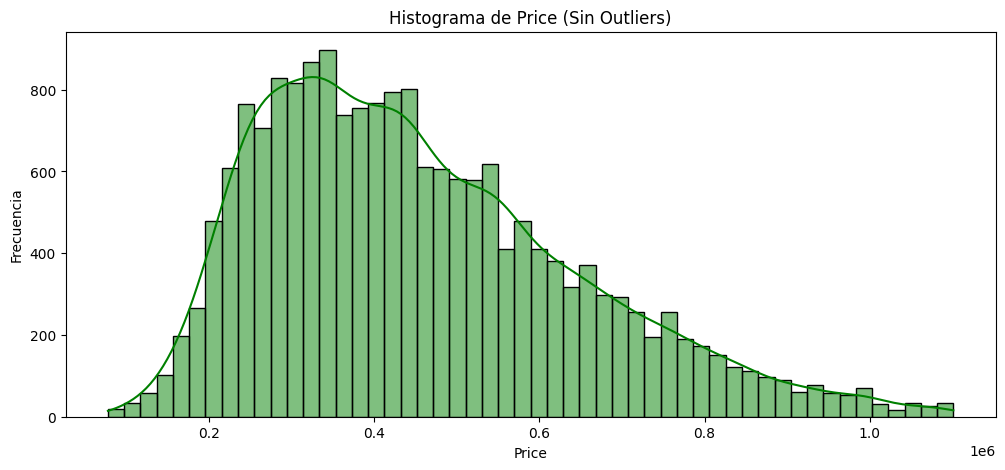

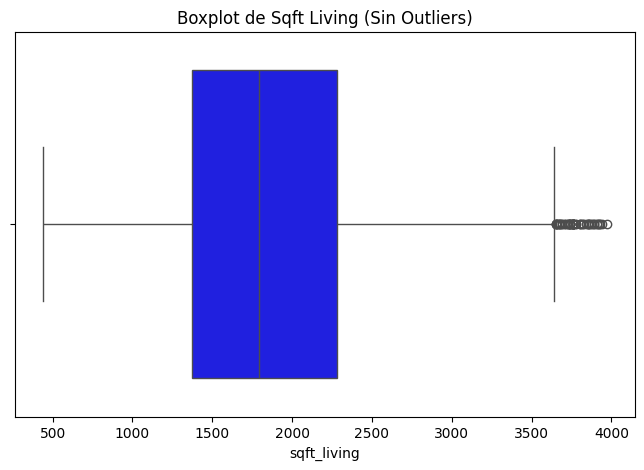

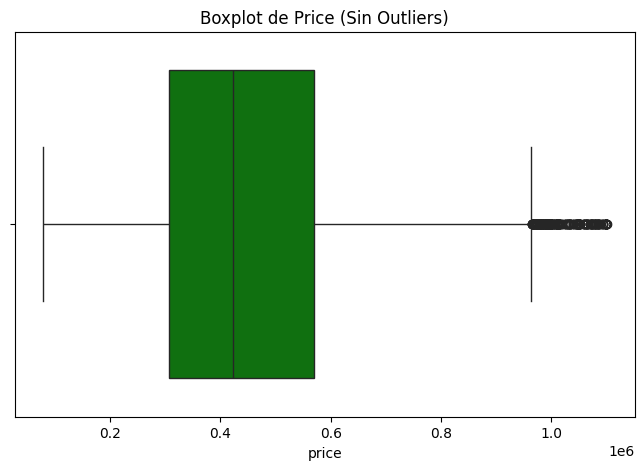

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que data2 solo contenga los valores sin outliers
df_sin_outliers = data2.loc[sqft_living_limpio.index.intersection(price_limpio.index)]

# Verificar que las columnas existen en el dataframe
if "sqft_living" in df_sin_outliers.columns and "price" in df_sin_outliers.columns:
    # Crear histogramas para 'sqft_living' y 'price'
    plt.figure(figsize=(12, 5))
    sns.histplot(df_sin_outliers["sqft_living"], kde=True, color="blue")
    plt.title("Histograma de Sqft Living (Sin Outliers)")
    plt.xlabel("Sqft Living")
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.histplot(df_sin_outliers["price"], kde=True, color="green")
    plt.title("Histograma de Price (Sin Outliers)")
    plt.xlabel("Price")
    plt.ylabel("Frecuencia")
    plt.show()

    # Crear boxplots para visualizar posibles valores extremos
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_sin_outliers["sqft_living"], color="blue")
    plt.title("Boxplot de Sqft Living (Sin Outliers)")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_sin_outliers["price"], color="green")
    plt.title("Boxplot de Price (Sin Outliers)")
    plt.show()

else:
    print("Las columnas 'sqft_living' o 'price' no están en el dataframe.")


In [35]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Convertir a numérico y manejar NaN (aunque ya se hizo antes, por seguridad)
data2['sqft_living'] = pd.to_numeric(data2['sqft_living'], errors='coerce')
data2['price'] = pd.to_numeric(data2['price'], errors='coerce')

# Eliminar filas con NaN en 'sqft_living' o 'price'
data2 = data2.dropna(subset=['sqft_living', 'price'])

# Eliminar valores cero antes de calcular outliers
data2 = data2[(data2['sqft_living'] > 0) & (data2['price'] > 0)]

def eliminar_outliers_iqr(column):
    """Elimina outliers usando el método del rango intercuartil (IQR)."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    datos_limpiados = column[(column >= limite_inferior) & (column <= limite_superior)]
    
    print(f"Outliers eliminados con IQR en {column.name}: {column.shape[0] - datos_limpiados.shape[0]}")
    return datos_limpiados

def eliminar_outliers_zscore(column):
    """Elimina outliers usando el método del Z-score (umbral de 3)."""
    z_scores = np.abs(zscore(column))
    datos_limpiados = column[z_scores < 3]
    
    print(f"Outliers eliminados con Z-score en {column.name}: {column.shape[0] - datos_limpiados.shape[0]}")
    return datos_limpiados

# Aplicar eliminación de outliers a 'sqft_living' y 'price'
sqft_living_limpio = eliminar_outliers_iqr(data2['sqft_living'])
sqft_living_limpio = eliminar_outliers_zscore(sqft_living_limpio)

price_limpio = eliminar_outliers_iqr(data2['price'])
price_limpio = eliminar_outliers_zscore(price_limpio)

# Crear un DataFrame limpio con solo las filas que coinciden en ambos conjuntos
data_limpio = data2.loc[sqft_living_limpio.index.intersection(price_limpio.index)].reset_index(drop=True)

# Verificar que no haya ceros en los datos finales
print(f"Ceros en sqft_living_limpio: {(data_limpio['sqft_living'] == 0).sum()}")
print(f"Ceros en price_limpio: {(data_limpio['price'] == 0).sum()}")

# Mostrar las primeras filas del DataFrame limpio
print(data_limpio.head())


Outliers eliminados con IQR en sqft_living: 52
Outliers eliminados con Z-score en sqft_living: 0
Outliers eliminados con IQR en price: 265
Outliers eliminados con Z-score en price: 0
Ceros en sqft_living_limpio: 0
Ceros en price_limpio: 0
   sqft_living     price
0         1180  221900.0
1         2570  538000.0
2          770  180000.0
3         1960  604000.0
4         1680  510000.0


In [36]:
print(f"Ceros en sqft_living_limpio: {(sqft_living_limpio == 0).sum()}")
print(f"Ceros en price_limpio: {(price_limpio == 0).sum()}")


Ceros en sqft_living_limpio: 0
Ceros en price_limpio: 0


In [37]:
from scipy.stats import boxcox

# Filtrar solo valores positivos para evitar errores con Box-Cox
sqft_living_limpio = sqft_living_limpio[sqft_living_limpio > 0]
price_limpio = price_limpio[price_limpio > 0]

# Aplicar la transformación Box-Cox
sqft_living_boxcox, lambda_sqft = boxcox(sqft_living_limpio)
price_boxcox, lambda_price = boxcox(price_limpio)

print(f"Lambda óptimo para sqft_living: {lambda_sqft:.4f}")
print(f"Lambda óptimo para price: {lambda_price:.4f}")


Lambda óptimo para sqft_living: 0.4145
Lambda óptimo para price: 0.2474


In [38]:
from scipy.stats import skew

# Calcular asimetría antes y después de Box-Cox
asimetria_antes_sqft = skew(sqft_living_limpio, nan_policy='omit')
asimetria_despues_sqft = skew(sqft_living_boxcox, nan_policy='omit') if len(sqft_living_boxcox) > 0 else float('nan')

asimetria_antes_price = skew(price_limpio, nan_policy='omit')
asimetria_despues_price = skew(price_boxcox, nan_policy='omit') if len(price_boxcox) > 0 else float('nan')

# Mostrar resultados redondeados
print(f"Asimetría antes de Box-Cox (sqft_living): {asimetria_antes_sqft:.2f}")
print(f"Asimetría después de Box-Cox (sqft_living): {asimetria_despues_sqft:.2f}")
print(f"Asimetría antes de Box-Cox (price): {asimetria_antes_price:.2f}")
print(f"Asimetría después de Box-Cox (price): {asimetria_despues_price:.2f}")


Asimetría antes de Box-Cox (sqft_living): 0.38
Asimetría después de Box-Cox (sqft_living): -0.03
Asimetría antes de Box-Cox (price): 0.61
Asimetría después de Box-Cox (price): -0.02


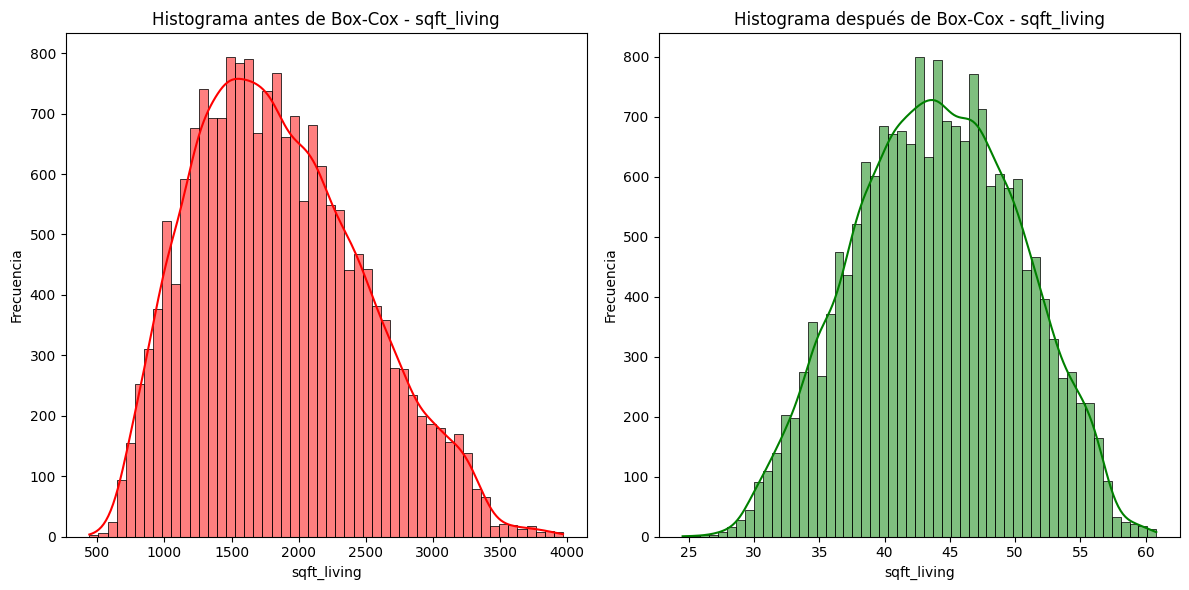

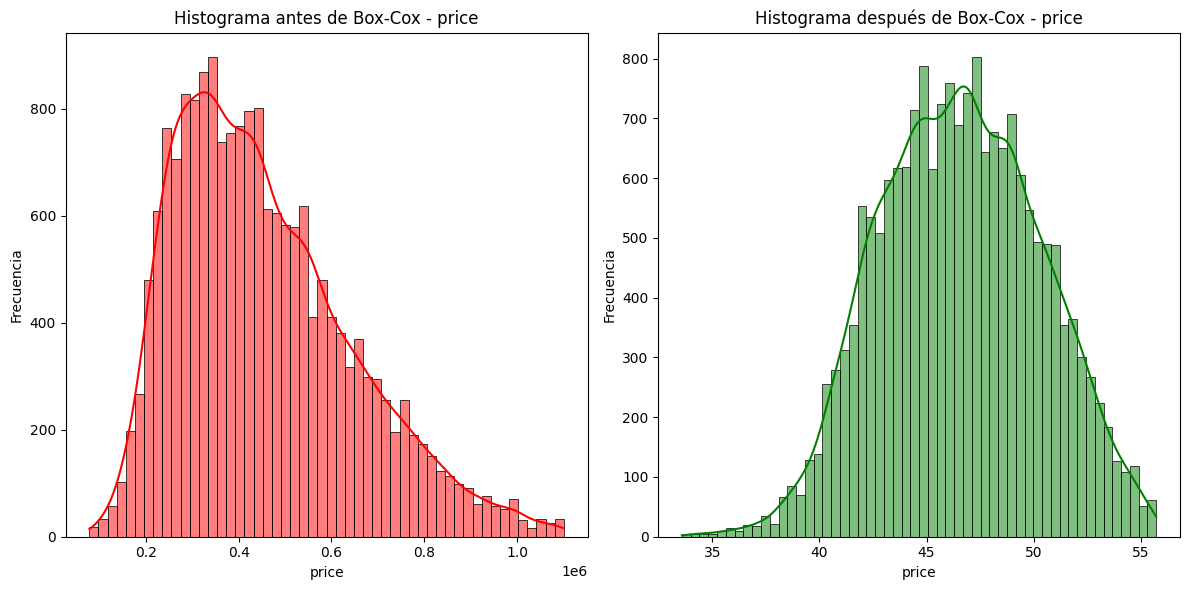

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que los datos transformados sean Series de Pandas con los mismos índices
sqft_living_boxcox_series = pd.Series(sqft_living_boxcox, index=sqft_living_limpio.index)
price_boxcox_series = pd.Series(price_boxcox, index=price_limpio.index)

# Función para comparar distribuciones antes y después de Box-Cox
def comparar_distribuciones_boxcox(original, transformado, titulo):
    plt.figure(figsize=(12, 6))

    # Histograma antes de Box-Cox
    plt.subplot(1, 2, 1)
    sns.histplot(original, kde=True, color='red')
    plt.title(f'Histograma antes de Box-Cox - {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Frecuencia')

    # Histograma después de Box-Cox
    plt.subplot(1, 2, 2)
    sns.histplot(transformado, kde=True, color='green')
    plt.title(f'Histograma después de Box-Cox - {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Comparar 'sqft_living' y 'price' antes y después de Box-Cox
comparar_distribuciones_boxcox(sqft_living_limpio, sqft_living_boxcox_series, 'sqft_living')
comparar_distribuciones_boxcox(price_limpio, price_boxcox_series, 'price')


In [47]:
print(f"Longitud de sqft_living_boxcox: {len(sqft_living_boxcox)}")
print(f"Longitud de price_boxcox: {len(price_boxcox)}")

# Verificar si las longitudes coinciden
if len(sqft_living_boxcox) == len(price_boxcox):
    print("✅ Ambas transformaciones tienen la misma longitud.")
else:
    print("⚠️ Las longitudes no coinciden. Puede haber datos faltantes.")


Longitud de sqft_living_boxcox: 18563
Longitud de price_boxcox: 18563
✅ Ambas transformaciones tienen la misma longitud.


Matriz de correlación:
                    Sqft_Living_BoxCox  Price_BoxCox
Sqft_Living_BoxCox            1.000000      0.550413
Price_BoxCox                  0.550413      1.000000


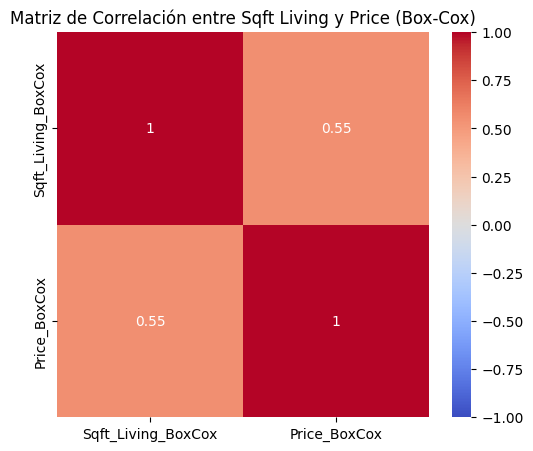

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las columnas transformadas
df_sin_outliers = pd.DataFrame({
    "Sqft_Living_BoxCox": sqft_living_boxcox,
    "Price_BoxCox": price_boxcox
})

# Calcular la matriz de correlación
correlation_matrix = df_sin_outliers.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Sqft Living y Price (Box-Cox)")
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Asegúrese de que 'sqft_living_boxcox' y 'price_boxcox' estén correctamente alineados
df_sin_outliers = pd.DataFrame({
    "Sqft_Living_BoxCox": sqft_living_boxcox,
    "Price_BoxCox": price_boxcox
})

# Verificar que no haya NaN
df_sin_outliers = df_sin_outliers.dropna(subset=['Sqft_Living_BoxCox', 'Price_BoxCox'])

# Definir X (features) y y (target)
X = df_sin_outliers["Sqft_Living_BoxCox"].values.reshape(-1, 1)  # Convertir a una matriz columna
y = df_sin_outliers["Price_BoxCox"].values

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test, y_test): {X_test.shape}, {y_test.shape}")



Tamaño del conjunto de entrenamiento (X_train, y_train): (14850, 1), (14850,)
Tamaño del conjunto de prueba (X_test, y_test): (3713, 1), (3713,)


In [50]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento (X_train, y_train)
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba (X_test)
y_pred = modelo.predict(X_test)

# Mostrar algunas de las predicciones
print(f"Predicciones: {y_pred[:10]}")  # Muestra las primeras 10 predicciones


Predicciones: [47.16113411 45.24092192 50.14955956 46.45246766 43.12701076 46.51906587
 42.23404478 45.97271381 46.0427693  46.21564293]


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo con métricas
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 10.08
Coeficiente de determinación (R²): 0.30


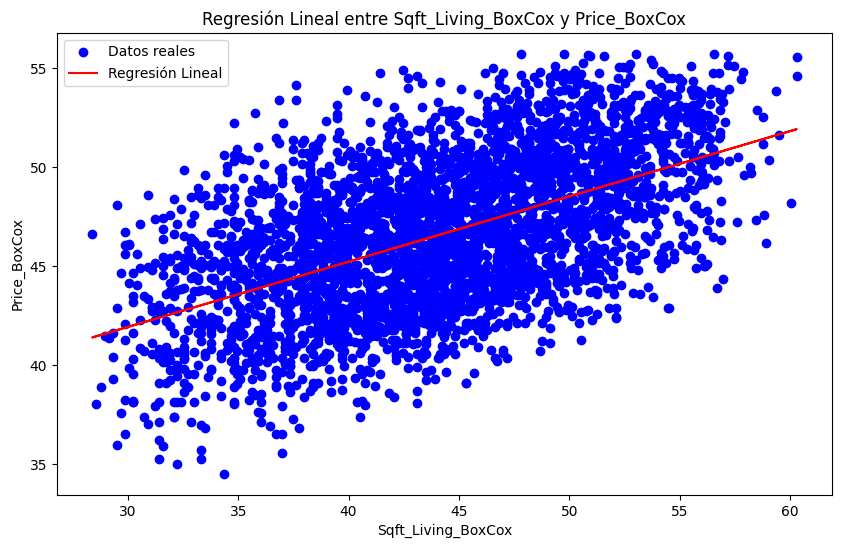

In [52]:
import matplotlib.pyplot as plt

# Asegurarse de que los datos de 'sqft_living_boxcox' y 'price_boxcox' están correctamente alineados
df_sin_outliers = pd.DataFrame({
    "Sqft_Living_BoxCox": sqft_living_boxcox,
    "Price_BoxCox": price_boxcox
})

# Verificar que no haya NaN
df_sin_outliers = df_sin_outliers.dropna(subset=['Sqft_Living_BoxCox', 'Price_BoxCox'])

# Definir X (features) y y (target)
X = df_sin_outliers["Sqft_Living_BoxCox"].values.reshape(-1, 1)  # Convertir a una matriz columna
y = df_sin_outliers["Price_BoxCox"].values

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(10,6))

# Crear gráfico de dispersión de los datos reales
plt.scatter(X_test, y_test, color="blue", label="Datos reales")

# Graficar la línea de regresión utilizando las predicciones del modelo
plt.plot(X_test, y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Sqft_Living_BoxCox")
plt.ylabel("Price_BoxCox")
plt.title("Regresión Lineal entre Sqft_Living_BoxCox y Price_BoxCox")
plt.legend()

# Mostrar el gráfico
plt.show()
